In [ ]:
from google.colab import files
upload= files.upload()


Saving home_page_table.csv to home_page_table.csv
Saving payment_confirmation_table.csv to payment_confirmation_table.csv
Saving payment_page_table.csv to payment_page_table.csv
Saving search_page_table.csv to search_page_table.csv
Saving user_table.csv to user_table.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Questions:
You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.
From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.
If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Specifically, she is interested in :
A full picture of funnel conversion rate for both desktop and mobile
Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

Overall information

In [ ]:
user_table=pd.read_csv("user_table.csv")
home_page_table=pd.read_csv('home_page_table.csv')
search_page_table=pd.read_csv('search_page_table.csv')
payment_page_table=pd.read_csv('payment_page_table.csv')
payment_confirmation_table=pd.read_csv('payment_confirmation_table.csv')

In [ ]:
user_table.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [ ]:
user_table2=pd.merge(user_table,home_page_table,how='outer')
user_table2.columns=['user_id','date','device','sex','home_page']
user_table3=pd.merge(user_table2,search_page_table,how='outer')
user_table3.columns=['user_id','date','device','sex','home_page','search_page']
user_table4=pd.merge(user_table3,payment_page_table,how='outer')
user_table4.columns=['user_id','date','device','sex','home_page','search_page','payment_page']
user_table5=pd.merge(user_table4,payment_confirmation_table,how='outer')
user_table5.columns=['user_id','date','device','sex','home_page','search_page','payment_page','confirmation_page']

In [ ]:
user_table5.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [ ]:
user_table5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   home_page          90400 non-null  object
 5   search_page        45200 non-null  object
 6   payment_page       6030 non-null   object
 7   confirmation_page  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [ ]:
user_count=user_table5.groupby('device').count().reset_index()
user_count.head()

,device,user_id,date,sex,home_page,search_page,payment_page,confirmation_page
0,Desktop,60200,60200,60200,60200,30100,3010,150
1,Mobile,30200,30200,30200,30200,15100,3020,302


In [ ]:
user_count['search_rate']=user_count['search_page'].div(user_count['home_page'])
user_count['payment_rate']=user_count['payment_page'].div(user_count['home_page'])
user_count['conversion_rate']=user_count['confirmation_page'].div(user_count['home_page'])

conversion_rate whole picture

In [ ]:
user_count

,device,user_id,date,sex,home_page,search_page,payment_page,confirmation_page,search_rate,payment_rate,conversion_rate
0,Desktop,60200,60200,60200,60200,30100,3010,150,0.5,0.05,0.002492
1,Mobile,30200,30200,30200,30200,15100,3020,302,0.5,0.10,0.010000


In [ ]:
table5_date=user_table5.groupby(['device','date']).count().reset_index()

In [ ]:
table5_date['search_rate']=table5_date['search_page'].div(table5_date['home_page'])
table5_date['payment_rate']=table5_date['payment_page'].div(table5_date['search_page'])
table5_date['confirm_rate']=table5_date['confirmation_page'].div(table5_date['payment_page'])
table5_date['conversion_rate']=table5_date['confirmation_page'].div(table5_date['home_page'])

In [ ]:
table5_date

,device,date,user_id,sex,home_page,search_page,payment_page,confirmation_page,search_rate,payment_rate,conversion_rate,confirm_rate
0,Desktop,2015-01-01,493,493,493,256,47,1,0.519270,0.183594,0.002028,0.021277
1,Desktop,2015-01-02,484,484,484,261,44,1,0.539256,0.168582,0.002066,0.022727
2,Desktop,2015-01-03,507,507,507,222,22,3,0.437870,0.099099,0.005917,0.136364
3,Desktop,2015-01-04,474,474,474,249,38,1,0.525316,0.152610,0.002110,0.026316
4,Desktop,2015-01-05,483,483,483,249,37,3,0.515528,0.148594,0.006211,0.081081
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Mobile,2015-04-26,263,263,263,48,12,0,0.182510,0.250000,0.000000,0.000000
236,Mobile,2015-04-27,270,270,270,55,16,1,0.203704,0.290909,0.003704,0.062500
237,Mobile,2015-04-28,260,260,260,54,16,1,0.207692,0.296296,0.003846,0.062500
238,Mobile,2015-04-29,260,260,260,52,6,0,0.200000,0.115385,0.000000,0.000000


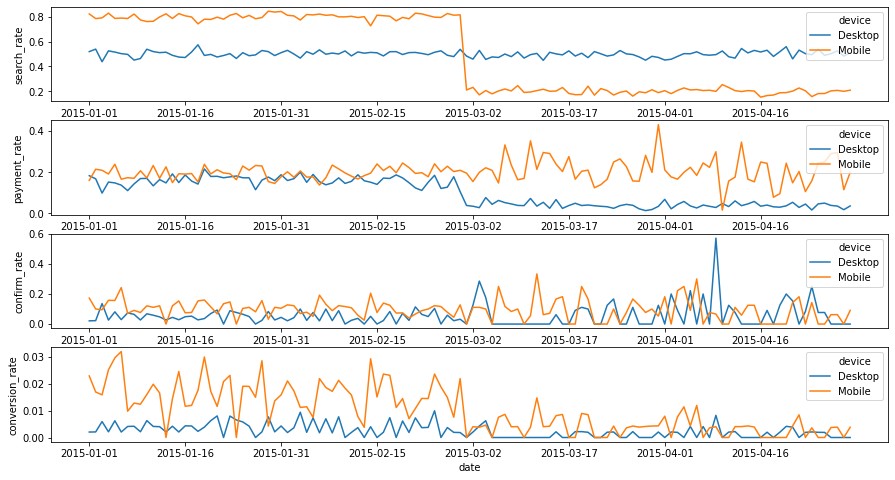

In [ ]:
fig,ax=plt.subplots(figsize=(15,8),nrows=4,ncols=1)
sns.lineplot(y=table5_date['search_rate'],x=table5_date['date'],hue=table5_date['device'],ax=ax[0])
ax[0].set(xticks=table5_date.date[0::15].unique())
sns.lineplot(y=table5_date['payment_rate'],x=table5_date['date'],hue=table5_date['device'],ax=ax[1])
ax[1].set(xticks=table5_date.date[0::15].unique())#######
sns.lineplot(y=table5_date['confirm_rate'],x=table5_date['date'],hue=table5_date['device'],ax=ax[2])
ax[2].set(xticks=table5_date.date[0::15].unique())
sns.lineplot(y=table5_date['conversion_rate'],x=table5_date['date'],hue=table5_date['device'],ax=ax[3])
ax[3].set(xticks=table5_date.date[0::15].unique())
ax[1].legend(loc = 'upper right')
ax[2].legend(loc = 'upper right')
#plt.xticks(rotation = 45)
plt.show()

In [ ]:
user_table6=user_table5.groupby(['sex','device']).count().reset_index()

In [ ]:
user_table6['search_rate']=user_table6['search_page'].div(user_table6['home_page'])
user_table6['payment_rate']=user_table6['payment_page'].div(user_table6['search_page'])
user_table6['confirm_rate']=user_table6['confirmation_page'].div(user_table6['payment_page'])
user_table6['conversion_rate']=user_table6['confirmation_page'].div(user_table6['home_page'])

In [ ]:
user_table6['sex_device']=user_table6['sex']+user_table6['device']
user_table6

,sex,device,user_id,date,home_page,search_page,payment_page,confirmation_page,search_rate,payment_rate,confirm_rate,conversion_rate,sex_device
0,Female,Desktop,29997,29997,29997,15091,1530,74,0.503084,0.101385,0.048366,0.002467,FemaleDesktop
1,Female,Mobile,15078,15078,15078,7585,1570,167,0.503051,0.206987,0.106369,0.011076,FemaleMobile
2,Male,Desktop,30203,30203,30203,15009,1480,76,0.496937,0.098608,0.051351,0.002516,MaleDesktop
3,Male,Mobile,15122,15122,15122,7515,1450,135,0.496958,0.192947,0.093103,0.008927,MaleMobile


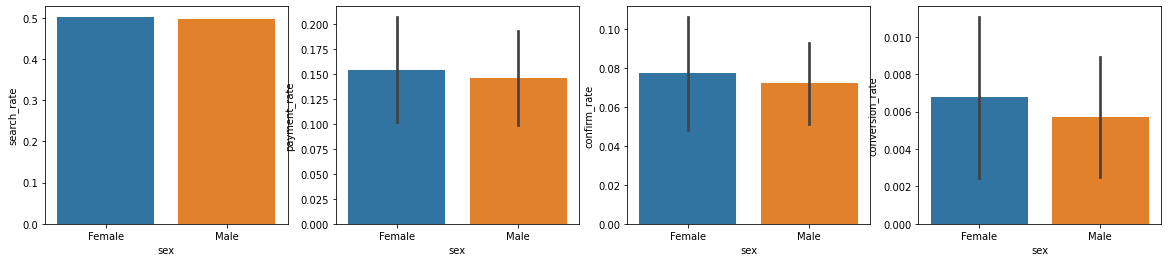

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,4))
sns.barplot(y=user_table6['search_rate'],x=user_table6['sex'],data=user_table6,ax=ax[0])
sns.barplot(y=user_table6['payment_rate'],x=user_table6['sex'],data=user_table6,ax=ax[1])
sns.barplot(y=user_table6['confirm_rate'],x=user_table6['sex'],data=user_table6,ax=ax[2])
sns.barplot(y=user_table6['conversion_rate'],x=user_table6['sex'],data=user_table6,ax=ax[3])
plt.show()

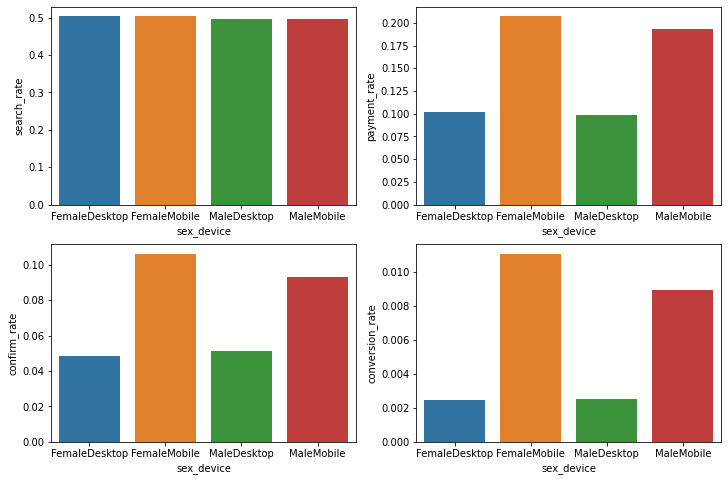

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.barplot(y=user_table6['search_rate'],x=user_table6['sex_device'],data=user_table6,ax=ax[0,0])
sns.barplot(y=user_table6['payment_rate'],x=user_table6['sex_device'],data=user_table6,ax=ax[0,1])
sns.barplot(y=user_table6['confirm_rate'],x=user_table6['sex_device'],data=user_table6,ax=ax[1,0])
sns.barplot(y=user_table6['conversion_rate'],x=user_table6['sex_device'],data=user_table6,ax=ax[1,1])
plt.show()